**Название:** Аналитик крупного интернет-магазина.

**Краткое описание:** Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.

**Цели и задачи:** Запустити A/B-тест и проанализировать результат.

**Описание исходных данных:**

    - Hypothesis: гипотезы
    - Visitors, orders: результаты А/В тестов
  
**План (декомпозиция) анализа данных:**

    - Шаг 1. Загржаем данные и подготовливаем их к анализу
    - Шаг 2. Приоритизируем гипотезы.
      - Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
      - Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
      - Сделаем выводы.
    - Шаг 3. Проанализируем A/B-тест:
      - Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
      - Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
      - Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
      - Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
      - Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
      - Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
      - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
      - Постром точечный график стоимостей заказов. Сделаем выводы и предположения.
      - Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
      - Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
      - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
      - Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
      - Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
    - Шаг 4. Сделаем общий вывод.


## Шаг 1. Загружаем подготоваливаем данные к анализу

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import datetime as dt


In [2]:
pd.set_option('display.max_colwidth', 150)

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
display(hypothesis.head(5))
display(orders.head(5))
display(visitors.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [6]:
#hypothesis.rename(columns={'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact':'impact', 'Confidence':'confidence', 'Efforts':'efforts'})
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.sample())


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [7]:
#orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}).head(5)
orders.columns = orders.columns.str.lower()

In [8]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

### Вывод
<br> 1) Импортировали и просмотрели таблицы.
<br> 2) Провели проверку на пропущенные данные, привели названия столбцов к стандартам.
<br> 3) Преобразовали данные о времени для дальнейших расчётов.

## Шаг 2. Приоритизируем гипотезы

In [9]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = round((hypothesis['impact']*hypothesis['confidence'])/ hypothesis['efforts'], 2)
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [10]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод
<br> Наиболее перспективные гипотезы по ICE 8,0,7
<br> Наиболее перспективные гипотезы по RICE 7,2,8

## Шаг 3. Проанализируем А/В тест

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [11]:
datesGroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [12]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )

In [13]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [14]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


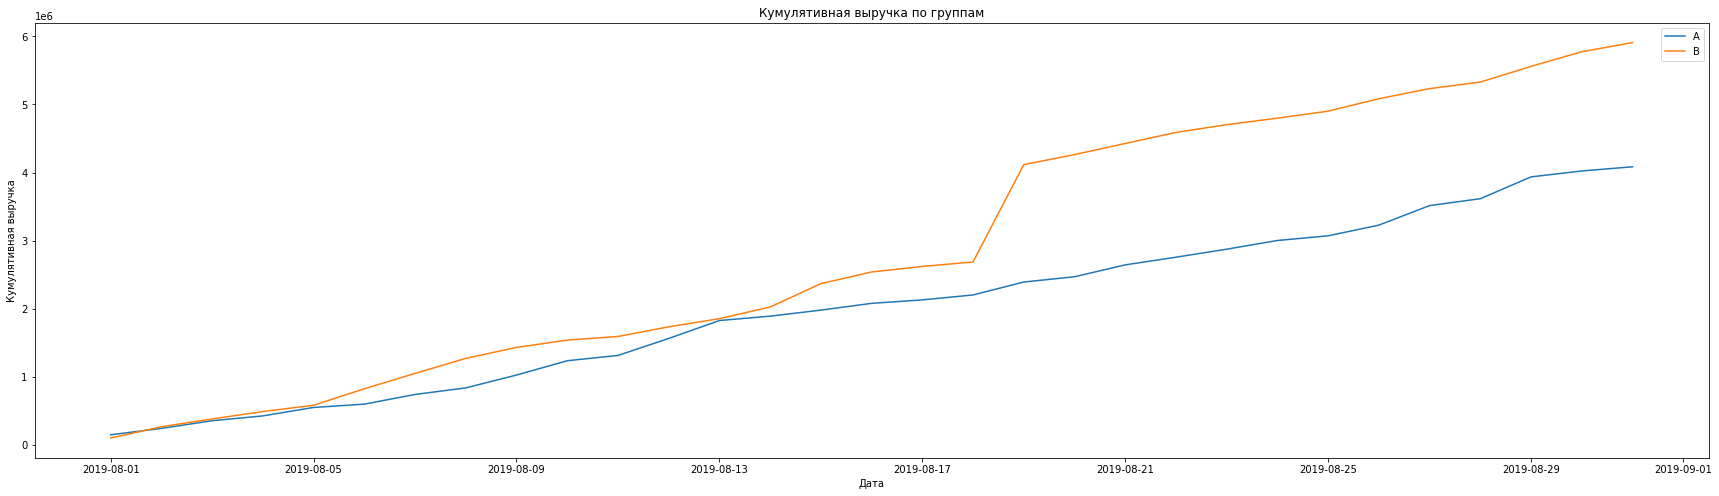

In [15]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]
plt.figure(figsize=(30, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show()


#### Вывод
В течение теста выручка до середины Августа равномерно увеличивалась, но выручка группы В в несколько раз возросла во второй половине Августа. Это может сигнализировать о вспелсках числа заказов, либо появлением дорогих заказов в выборке.

### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

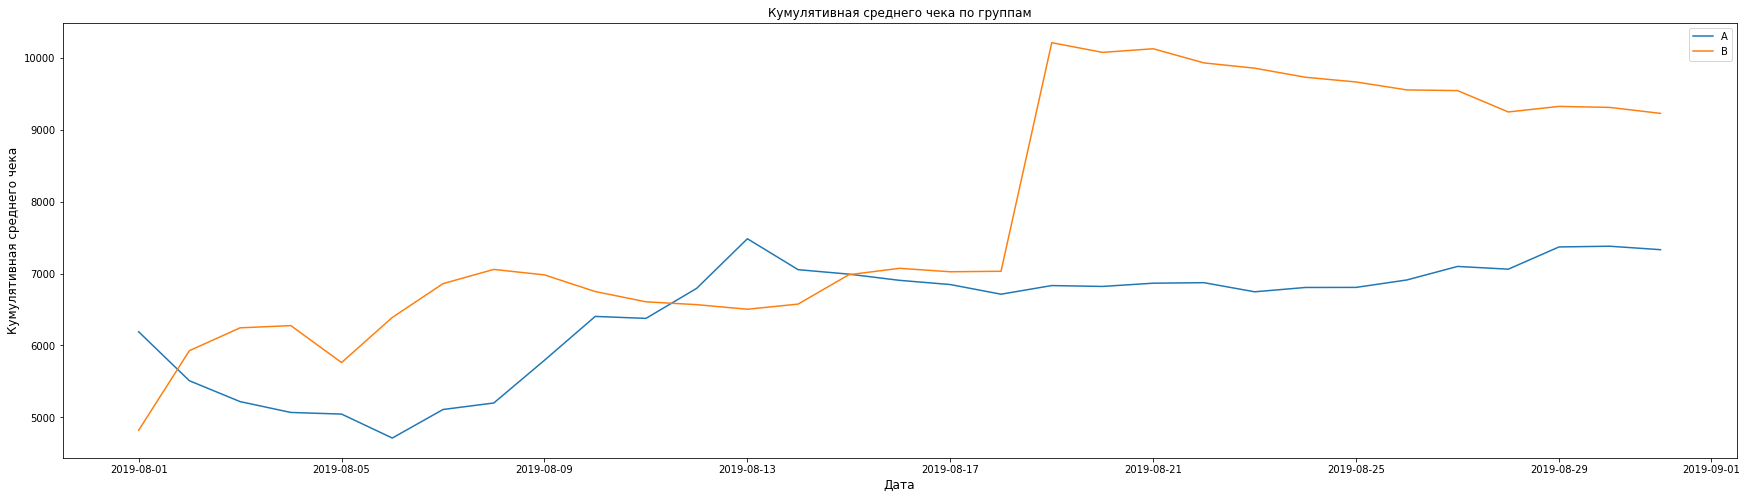

In [16]:
plt.figure(figsize=(30, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивная среднего чека по группам')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная среднего чека', fontsize=12)
plt.legend()
plt.show()

#### Вывод
Средний чек для группы А установился ближе к концу теста, а у группы В виден резкий всплеск, возможно в эту группу попали крупные заказы.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

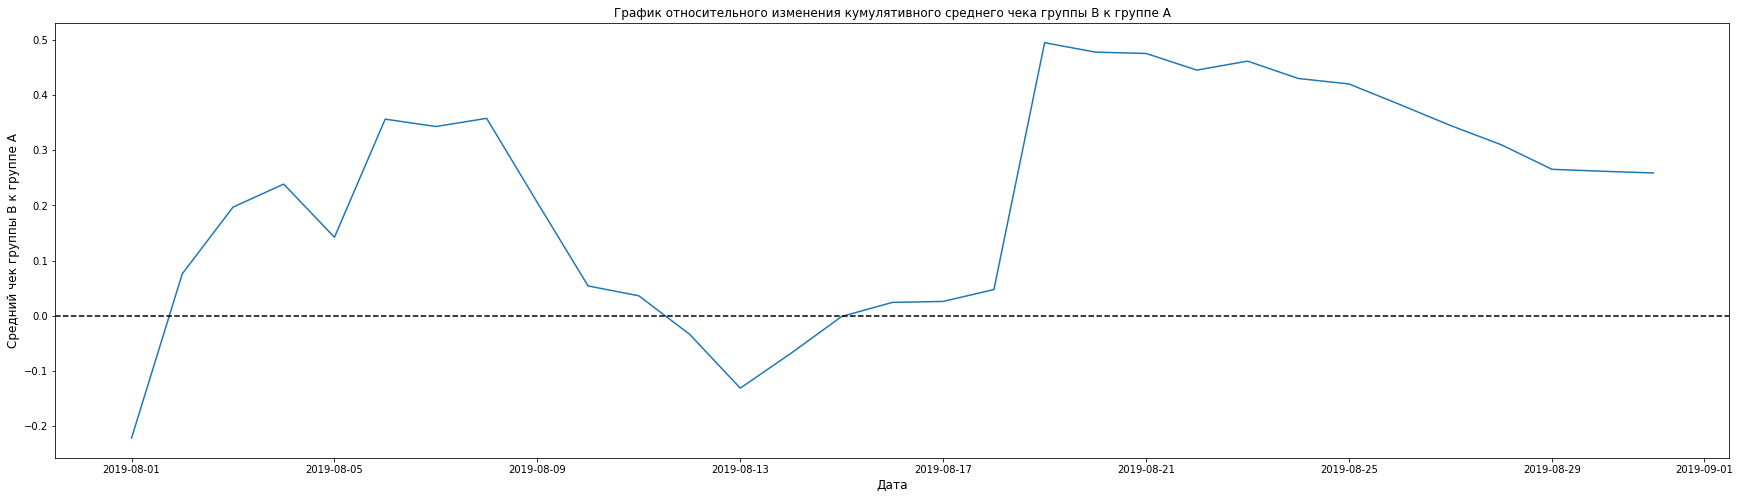

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(30, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний чек группы В к группе А', fontsize=12)
plt.show()

#### Вывод
В нескольких точках график различия между сегментами резко возрастает, вохможно всему виной крупные заказы и выборсы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

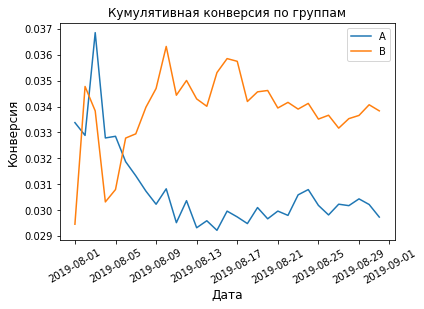

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей

plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

#### Вывод
Конверсия группы А просела и к концу теста колебалась около значений 0,030-0,031, а вот конверсия группы В вырвалась вперед и к концу теста колебалась около значений 0,033-0,035.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

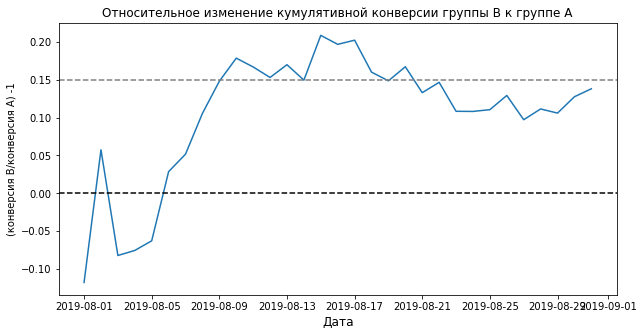

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1')
plt.show()

#### Вывод
Конверсия группы В опередила конверсию группы А, в целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы рано. Прежстоит проанализировать аномалии и проанализировать графики.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [20]:
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers['orders'].describe())

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

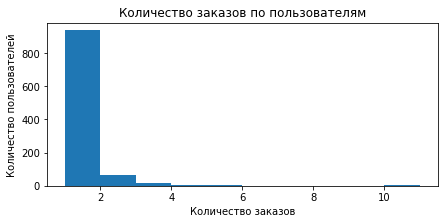

In [21]:
plt.figure(figsize=(7,3))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

- Большинство пользователей оформляли заказ всего 1 раз.

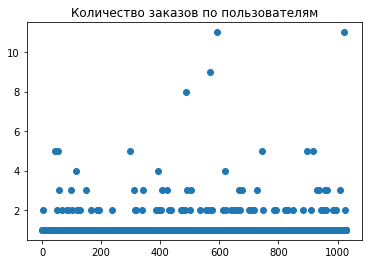

In [22]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.show()

#### Вывод
На точечной диаграмме видим, что есть пользователи с 2-4 заказами, и их достаточно много.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
display(np.percentile(ordersByUsers['orders'],[95,99]))

array([2., 4.])

#### Вывод 
Не более 5% оформляли 2 заказа, и не более 1% свыше 4 заказов.
Границу для определения аномальных пользоватаелй определим в 3 заказа.

### Постром точечный график стоимостей заказов. Сделаем выводы и предположения.

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

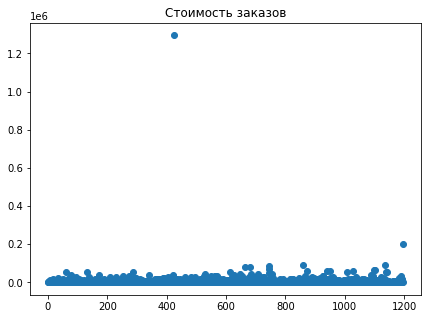

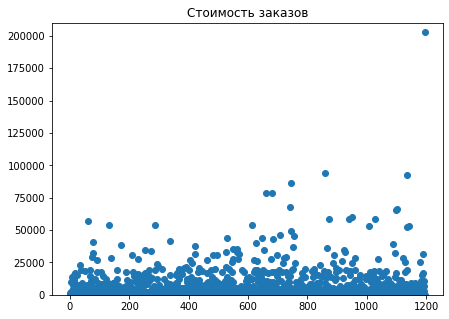

In [24]:
display(orders['revenue'].describe())
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(7,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.show()

plt.figure(figsize=(7,5))
plt.ylim(0, 210000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.show()

#### Вывод
По точечной диаграмме мы видим, что есть немного дорогих заказов, один из которых составляет 1.2+ млн. у.е., которые сильно искажает результат. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [25]:
display(np.percentile(orders['revenue'],[95,99]))

array([28000. , 58233.2])

#### Вывод
Не более 5% заказов больше 28000 у.е., и не более 1% больше 58233,2 у.е.
Границу для определения аномальных зазаков определим в 29000 у.е.

  ### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:
    
   3.10.1: 
          <br> а) H0: статистически значимых различий в конверсии между группами по "сырым" данным нет.
          <br> б) Н1: статистически значимые различия в конверсии между группами по "сырым" данным есть.
    
   3.11.1: 
          <br> а) Н0: статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.
          <br> б) Н1: статистически значимые различия в среднем чеке заказа между группами по «сырым» данным есть.
    
   3.12.1: 
          <br> а) Н0: статистически значимых различий в конверсии между группами по «очищенным» данным нет.
          <br> б) Н1: статистически значимые различия в конверсии между группами по «очищенным» данным есть.
    
   3.13.1: 
          <br> а) Н0: статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет.
          <br> б) Н1: статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [26]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [27]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [28]:
display("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'0.01679'

'0.138'

#### Вывод
Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем, между конверсиями групп А и В есть статистически значимая разница. Относительный проигрыш группы B равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

- Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [29]:
display('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))   

'0.729'

'0.259'

#### Вывод
Нулевую гипотезу о том, что различий в среднем чеке между группами нет, не отвергаем, средний чек между группами А и В не отличается. Выигрыш среднего чека группы В относительно группы А равен 25.9% - второе число в выводе.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

In [30]:
# Узнаем сколько аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 29000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorid, dtype: int64
59


- Всего 59 аномальных пользователей.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
display('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'0.018'

'0.148'

#### Вывод
По очищенным данным между конверсиями групп А и В практически осталась без изменения, статистически значимая разница есть.
При этом относительный выигрыш группы В увеличился на 1% по сравнению с "сырыми" данными и стал равен 14.8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

In [32]:
display(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'0.964'

'-0.019'

#### Вывод
P-value увеличился, но и разница между сегментами сократилась с 25.9% до 1.9%.

## Шаг 4. Общий вывод

- Есть статистически значимые различия по конверсии между группами по «сырым»,  по данным после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы А хуже группы В и есть тенденции к улучшению:
  -График изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.
- Исходя из обнаруженных фактов, тест следует остановить и признать его успешным - победа группы В. 